In [2]:
#install spliting folder
!pip install split-folders
!pip install split-folders tqdm

In [3]:
#import tenserflow
import tensorflow as tensorflow
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#print tensorflow version
print(tensorflow.__version__)

2.5.0


In [5]:
#download dataset tensorflow backend
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip

--2021-06-22 20:01:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  11.9MB/s    in 31s     

2021-06-22 20:02:11 (9.88 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
# Read & extract dataset
import zipfile,os
local_zip ='rockpaperscissors.zip'
zip_ref =zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/rock/')
zip_ref.close()

In [8]:
# Split dataset data train set and validation set
import splitfolders
splitfolders.ratio('/rock/rockpaperscissors/rps-cv-images', output="/rock/rockpaperscissors/output_result", ratio=(0.6, 0.4))

Copying files: 2188 files [00:00, 2721.69 files/s]


In [9]:
# define folder location
base_dir = '/rock/rockpaperscissors/output_result'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('/rock/rockpaperscissors/output_result/val')

['rock', 'scissors', 'paper']

In [10]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [11]:
# setup image data generator
from keras.preprocessing.image import ImageDataGenerator
data_train_img_gen = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
  )

data_val_img_gen = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
  )

In [12]:
train_generator = data_train_img_gen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True
  )
       
validation_generator = data_val_img_gen.flow_from_directory(
  validation_dir,
  target_size =(150,150),
  batch_size =32,
  color_mode='rgb',
  class_mode ='categorical',
  )

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# Create model and do training data
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
Conv2D(64, (3,3), activation='relu'),
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tensorflow.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 25s - loss: 1.1039 - accuracy: 0.4338 - val_loss: 0.9926 - val_accuracy: 0.5875
Epoch 2/20
25/25 - 24s - loss: 0.8113 - accuracy: 0.6775 - val_loss: 0.7281 - val_accuracy: 0.6812
Epoch 3/20
25/25 - 24s - loss: 0.4450 - accuracy: 0.8388 - val_loss: 0.4039 - val_accuracy: 0.8562
Epoch 4/20
25/25 - 24s - loss: 0.4043 - accuracy: 0.8450 - val_loss: 0.4252 - val_accuracy: 0.8562
Epoch 5/20
25/25 - 23s - loss: 0.2997 - accuracy: 0.9013 - val_loss: 0.4704 - val_accuracy: 0.8313
Epoch 6/20
25/25 - 23s - loss: 0.2769 - accuracy: 0.9000 - val_loss: 0.2423 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 24s - loss: 0.2883 - accuracy: 0.8900 - val_loss: 0.2259 - val_accuracy: 0.9187
Epoch 8/20
25/25 - 24s - loss: 0.2483 - accuracy: 0.9112 - val_loss: 0.3771 - val_accuracy: 0.8813
Epoch 9/20
25/25 - 23s - loss: 0.1882 - accuracy: 0.9312 - val_loss: 0.2183 - val_accuracy: 0.9125
Epoch 10/20
25/25 - 24s - loss: 0.2104 - accuracy: 0.9225 - val_loss: 0.3515 - val_accuracy: 0.8813
Epoch 11/

In [14]:
#Let's See summary of model
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tensorflow.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0

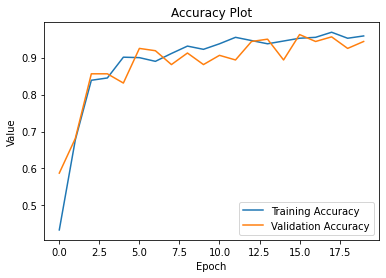

In [15]:
#accuracy train set & validation set
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

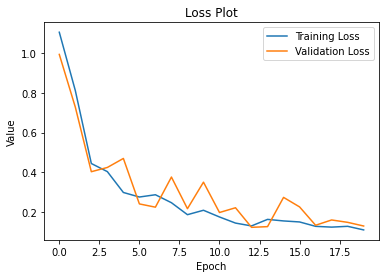

In [16]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [17]:
# Make definition for check the result
def check_result(result):
  if result == 0:
    return 'paper'
  elif result == 1:
    return 'rock'
  elif result == 2:
    return 'scissors'

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


scissors


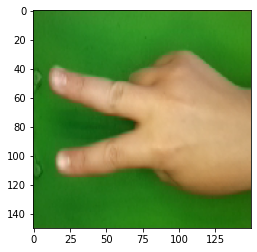

In [18]:
# Make function for upload file and do prediction
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
def check_uploaded_image():
  for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    result = model.predict_classes(images)[0]

    print(check_result(int(result)))
check_uploaded_image()